In [1]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
# setting path
import os, sys
current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

In [3]:
from source.utils.probing_tasks_utils import *
from source.utils.visualization import plot_histogram
from source.probing.similarity_pairs_probing.get_data import get_pair_similarity_probing_task_df
from config import TYPE, SIZE, EMBEDDING_PATH
from config import SIMILARITY_PATH, EMBEDDING_PATH, PRETRAIN_OUTPUT_PATH
from source.emb_extr_res.emb_extr_res import get_embeddings_df, get_pairs_similarity_df
from source.load_data.wdc.load_wdc_dataset import EnglishDatasetLoader

# Probing task: similarity

### a) similarity of offers used in training (training set) 

Loading training dataset

In [4]:
df_train = pd.read_csv(r"D:\Repos\NLP-2022W-MOP\PROJECTS\mop_probing_ecomm\datasets\natural\raw_train\natural_train.csv", sep=',') # EnglishDatasetLoader.load_train(type=TYPE, size=SIZE)
df_train.drop(["Unnamed: 0"], axis=1, inplace=True)
# df_train =  EnglishDatasetLoader.load_train(type=TYPE, size=SIZE)
df_train_levenstein = df_train.copy()
df_train_javo = df_train.copy()
df_train_jaccard = df_train.copy()

Computing distances using three different metrics for each pair - a new target variable for this probing task

In [5]:
df_train_levenstein['label'], df_train_javo['label'], df_train_jaccard['label'] = compute_string_dist_for_pairs(df_train)

Choosing the best bins for discretization of the new target variable - similarity score of each pair

In [6]:
def choose_bins(df_train, bins):
    plot_histogram(df_train['label'].values, bins='auto')
    plot_histogram(df_train['label'].values, bins=bins)

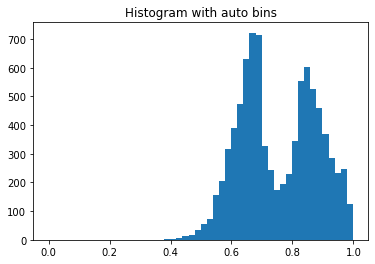

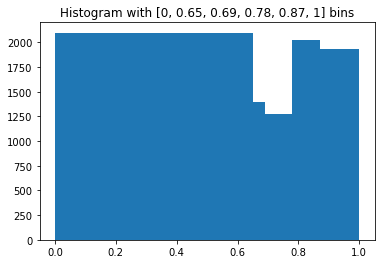

In [7]:
# bins_levenstein=[0, 0.6, 0.64, 0.68, 0.8, 1] # cameras, computers
bins_levenstein=[0, 0.65, 0.69, 0.78, 0.87, 1] # natural
choose_bins(df_train_levenstein, bins_levenstein)

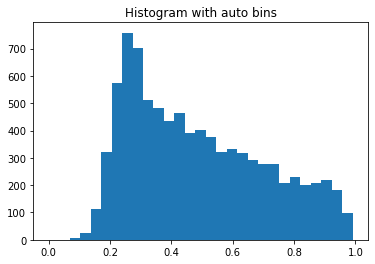

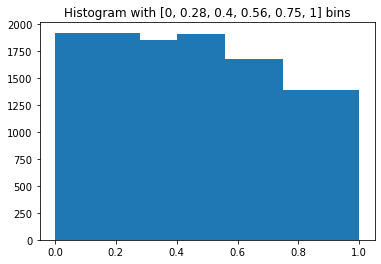

In [8]:
# bins_javo=[0, 0.21, 0.26, 0.33, 0.45, 1] # cameras, computers
bins_javo=[0, 0.28, 0.4, 0.56, 0.75, 1] # natural
choose_bins(df_train_javo, bins_javo)

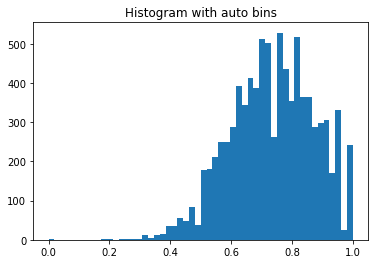

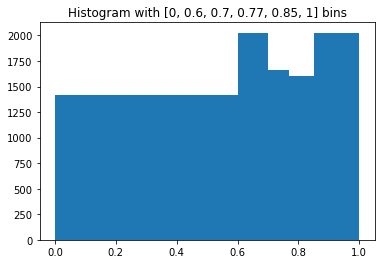

In [9]:
# bins_jaccard=[0, 0.57, 0.64, 0.7, 0.8, 1] # cameras, computers
bins_jaccard=[0, 0.6, 0.7, 0.77, 0.85, 1] # natural
choose_bins(df_train_jaccard, bins_jaccard)

Discretize the target variable

In [10]:
df_train_levenstein['label'] = pd.cut(x=df_train_levenstein['label'], bins=bins_levenstein, labels=[0, 1, 2, 3, 4])
df_train_javo['label'] = pd.cut(x=df_train_javo['label'], bins=bins_javo, labels=[0, 1, 2, 3, 4])
df_train_jaccard['label'] = pd.cut(x=df_train_jaccard['label'], bins=bins_jaccard, labels=[0, 1, 2, 3, 4])

Get embeddings result data frame:

In [11]:
train_embeddings_path = path.join(EMBEDDING_PATH, r'train_embeddings.csv')
embedding_train_df = get_embeddings_df(train_embeddings_path)

In [12]:
def save_embeddings(df_train, embedding_train_df, metric):
    train_dataset = get_pair_similarity_probing_task_df(df_train, embedding_train_df)
    train_dataset.to_csv(os.path.join(EMBEDDING_PATH, f"embeddings_for_probing_task_input/text_similarity_probing_task_input_{metric}.csv"), index=False)


Save dataset to csv as an input for probing task (tested in separate script)

In [13]:
save_embeddings(df_train_levenstein, embedding_train_df, metric='levenstein')
save_embeddings(df_train_javo, embedding_train_df, metric='javo')
save_embeddings(df_train_jaccard, embedding_train_df, metric='jaccard')